# Fitting Models

In [1]:
# Import the modules made for feature imputation/engineering/selection
import sys
sys.path.insert(0,'..')
import FeatureEngineering_Module as fe
import Imputation_Module as imp
import OneHotEncoding_Module as ohe

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

## Load data and set it up for modelling

In [3]:
train, test = imp.impute_data()

In [4]:
# create a pipeline with a single transformer
pipe = Pipeline([
    ('selector', fe.FeatureEngineering())
])

train = pipe.transform(train)
test = pipe.transform(test)

In [5]:
# Isolating the target feature and applying log transformation for normality
saleprice = train["SalePrice"]
Y = saleprice.apply(np.log)
X = train.drop("SalePrice", axis = 1)

In [6]:
train, test = ce.Dummify.transform(train, test)

## Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = \
        train_test_split(X, Y, test_size=0.2, random_state=0)

## Multiple Linear Regression

In [8]:
ols = LinearRegression()

In [9]:
ols.fit(X_train,y_train)
print(ols.score(X_train, y_train))
print(ols.score(X_test, y_test))

0.9327441584593247
0.9143611817897903


### Cross-Validation and predict on test set

In [11]:
scores = cross_val_score(estimator = ols, X = X, y = Y, cv = 5)
np.mean(scores)

0.9003814903927287

In [13]:
pred = cross_val_predict(estimator = ols, X = X, y = Y, cv = 5)
RMSLE = np.sqrt(mean_squared_error(pred, Y))
RMSLE

0.12482245311429885

Text(0, 0.5, 'Predicted Value')

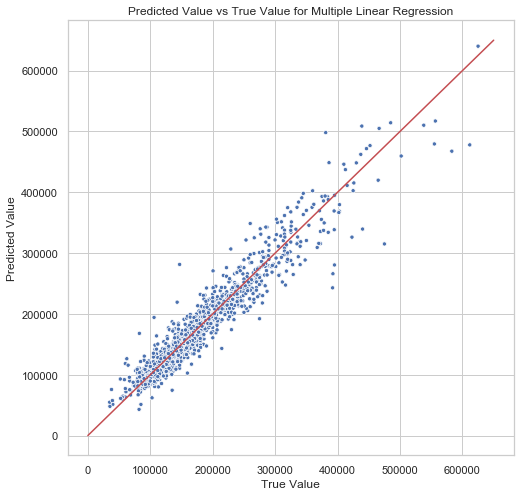

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = saleprice, y = np.exp(pred), size = 8, legend = False)
plt.plot([0,650000],[0,650000], color = "r")
plt.title("Predicted Value vs True Value for Multiple Linear Regression")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

## Ridge Regression

In [15]:
ridge = Ridge(normalize = True)

In [16]:
alpha_100 = np.logspace(-5,5, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(X, Y)
    coef.append(ridge.coef_)

Text(0, 0.5, 'coefficients')

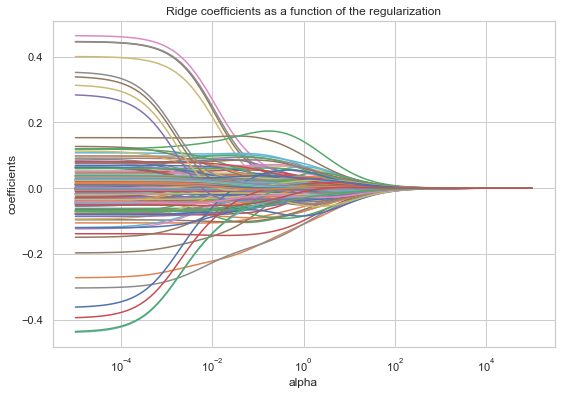

In [17]:
df_coef = pd.DataFrame(coef, index=alpha_100)
title = 'Ridge coefficients as a function of the regularization'
axes = df_coef.plot(logx = True, title=title, legend = False)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')

In [18]:
ridgecv = RidgeCV(alphas = alpha_100, normalize = True, cv = 5)

In [19]:
ridgecv.fit(X_train, y_train)
print(ridgecv.score(X_train, y_train))
ridgecv.score(X_test, y_test)

0.9314639511020797


0.9177677184129165

In [20]:
ridgecv.fit(X,Y)
pred = ridgecv.predict(X)
RMSLE = np.sqrt(mean_squared_error(pred, Y))
RMSLE

0.10432558205079506

Text(0, 0.5, 'Predicted Value')

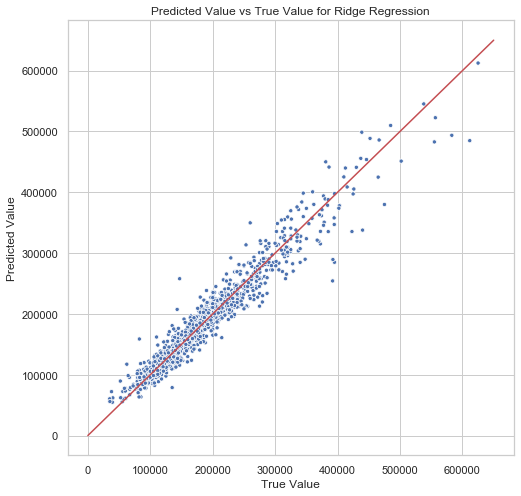

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = saleprice, y = np.exp(pred), size = 8, legend = False)
plt.plot([0,650000],[0,650000], color = "r")
plt.title("Predicted Value vs True Value for Ridge Regression")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

## Lasso Regression

In [23]:
lasso = Lasso(normalize = True, max_iter = 10000)

In [24]:
alpha_100 = np.logspace(-7,-1, 100)
coef = []
for i in alpha_100:
    lasso.set_params(alpha = i)
    lasso.fit(X, Y)
    coef.append(lasso.coef_)

Text(0, 0.5, 'coefficients')

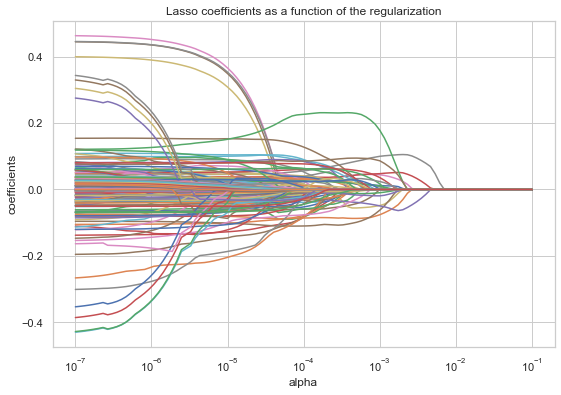

In [25]:
df_coef = pd.DataFrame(coef, index=alpha_100)
title = 'Lasso coefficients as a function of the regularization'
axes = df_coef.plot(logx = True, title=title, legend = False)
axes.set_xlabel('alpha')
axes.set_ylabel('coefficients')

In [26]:
lassocv = LassoCV(alphas = None, normalize = True, cv = 5, max_iter = 10000)

In [27]:
lassocv.fit(X_train, y_train)
print(lassocv.score(X_train, y_train))
lassocv.score(X_test, y_test)

0.9303768343979807


0.9206656798470171

In [28]:
lassocv.fit(X,Y)
pred = lassocv.predict(X)
RMSLE = np.sqrt(mean_squared_error(pred, Y))
RMSLE

0.10507921446805442

Text(0, 0.5, 'Predicted Value')

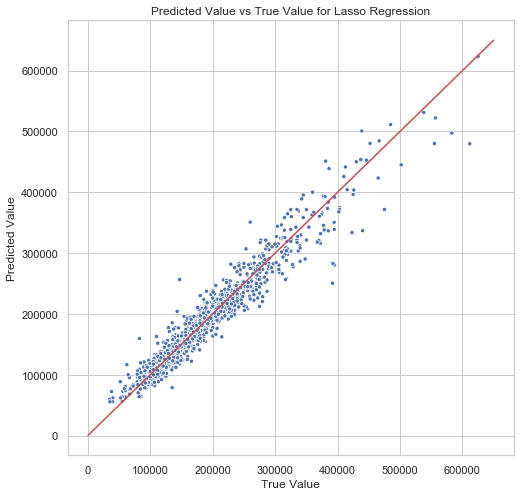

In [29]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = saleprice, y = np.exp(pred), size = 8, legend = False)
plt.plot([0,650000],[0,650000], color = "r")
plt.title("Predicted Value vs True Value for Lasso Regression")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

## Random Forest

In [27]:
randomForest = RandomForestRegressor()

In [28]:
randomForest.set_params(random_state = 0)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [29]:
randomForest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [30]:
randomForest.score(X_train, y_train)

0.9800955278204609

In [31]:
randomForest.score(X_test, y_test)

0.9010647824448844

In [45]:
grid_para_forest = {
    'max_depth': range(20, 31),
    'n_estimators': range(100, 200, 10)
}

In [46]:
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5)
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [47]:
grid_search_forest.best_params_

{'max_depth': 21, 'n_estimators': 180}

In [48]:
grid_search_forest.best_score_

0.8484967669807469

In [52]:
grid_search_forest.score(X_train, y_train)

0.9803017647224539

In [38]:
# get the training/test errors
print("The training score is: %.5f" % (grid_search_forest.best_estimator_.score(X_train, y_train)))
print("The test     score is: %.5f" % (grid_search_forest.best_estimator_.score(X_test, y_test)))

The training score is: 0.98020
The test     score is: 0.90106


In [39]:
pred = grid_search_forest.best_estimator_.predict(X)
RMSLE = np.sqrt(mean_squared_error(pred, Y))
RMSLE

0.07416769119738989

Text(0, 0.5, 'Predicted Value')

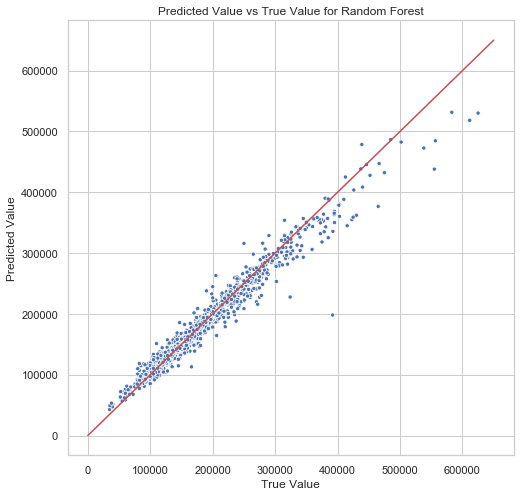

In [40]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = saleprice, y = np.exp(pred), size = 8, legend = False)
plt.plot([0,650000],[0,650000], color = "r")
plt.title("Predicted Value vs True Value for Random Forest")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

## Format for Kaggle Submission

In [ ]:
# sample = pd.read_csv("../sample_submission.csv", index_col = "Id")
# sample["SalePrice"] = pred
# sample.to_csv("RF.csv")

In [ ]:
# sample